In [4]:
!wget https://raw.githubusercontent.com/Alireza-Akhavan/SRU-deeplearning-workshop/master/dataset.py
#!mkdir dataset
!wget https://github.com/Alireza-Akhavan/SRU-deeplearning-workshop/raw/master/dataset/Data_hoda_full.mat -P dataset

--2024-01-02 09:15:33--  https://raw.githubusercontent.com/Alireza-Akhavan/SRU-deeplearning-workshop/master/dataset.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 917 [text/plain]
Saving to: ‘dataset.py.1’

dataset.py.1        100%[===================>]     917  --.-KB/s    in 0s      

2024-01-02 09:15:33 (68.5 MB/s) - ‘dataset.py.1’ saved [917/917]

--2024-01-02 09:15:33--  https://github.com/Alireza-Akhavan/SRU-deeplearning-workshop/raw/master/dataset/Data_hoda_full.mat
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/Alireza-Akhavan/deeplearning-tensorflow2-notebooks/raw/master/dataset/Data_

In [5]:
# 1. Import libraries and modules
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout
import numpy as np
from dataset import load_hoda
import matplotlib.pyplot as plt

In [6]:
# Load pre-shuffled HODA data into train and test sets
X_train, y_train, X_test, y_test = load_hoda(
                                            training_sample_size=3500,
                                            test_sample_size=400,size=32)

# reshape

In [7]:

# Reshape to original image shape (n x 784)  ==> (n x 28 x 28 x 1)
X_train_32 = X_train.reshape(-1,32,32,1)
X_test_32 = X_test.reshape(-1,32,32,1)
X_train_32.shape

(3500, 32, 32, 1)

In [8]:
import cv2
import numpy as np

In [9]:
X_train_28 = np.zeros((X_train_32.shape[0], 28, 28, 1))
for i in range(X_train_32.shape[0]):
    # Resize the sample from shape (32, 32, 1) to shape (28, 28, 1) using OpenCV
    resized_sample = cv2.resize(X_train_32[i], (28, 28), interpolation=cv2.INTER_AREA)
    # Assign the resized sample to the corresponding index in the new numpy array
    X_train_28[i] = resized_sample.reshape((28, 28, 1))

X_test_28 = np.zeros((X_test_32.shape[0], 28, 28, 1))
for i in range(X_test_32.shape[0]):
    # Resize the sample from shape (32, 32, 1) to shape (28, 28, 1) using OpenCV
    resized_sample = cv2.resize(X_test_32[i], (28, 28), interpolation=cv2.INTER_AREA)
    # Assign the resized sample to the corresponding index in the new numpy array
    X_test_28[i] = resized_sample.reshape((28, 28, 1))

In [10]:
import matplotlib.pyplot as plt

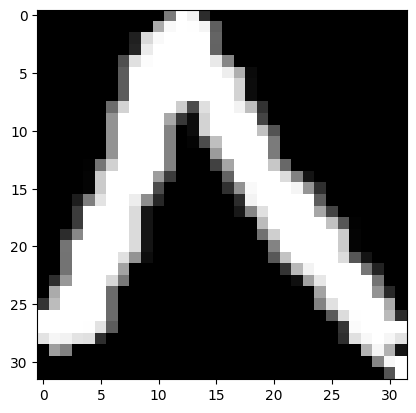

In [11]:
plt.imshow(X_test_32[0], cmap='gray')

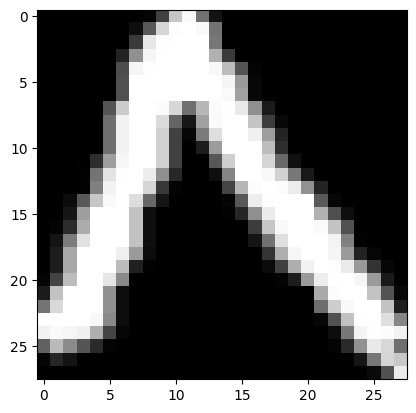

In [12]:
plt.imshow(X_test_28[0], cmap='gray')

In [13]:
# Preprocess input data
'''normalize our data values to the range [0, 1]'''
X_train_32 = X_train_32.astype('float32')
X_test_32 = X_test_32.astype('float32')
X_train_32 /= 255
X_test_32 /= 255

# Preprocess input data
'''normalize our data values to the range [0, 1]'''
X_train_28 = X_train_28.astype('float32')
X_test_28 = X_test_28.astype('float32')
X_train_28 /= 255
X_test_28 /= 255


In [14]:

# 4. Preprocess class labels
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)


# 1st senario

In [15]:
# 5. Define model architecture
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))


# 6. Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])





In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 1, 1, 64)          0

In [17]:
# 5. Define model architecture
model2= Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(32, 32, 1)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((3, 3)))
model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation='relu'))
model2.add(Dropout(0.5))
model2.add(layers.Dense(10, activation='softmax'))


# 6. Compile model
model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [18]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 1, 1, 64)         

In [19]:
# 7. Fit model on training data
history = model2.fit(X_train_32, y_train,
          epochs=200, batch_size=256, validation_split=0.2)

Epoch 1/200
11/11 [==============================] - 7s 83ms/step - loss: 2.2427 - accuracy: 0.1961 - val_loss: 2.1315 - val_accuracy: 0.4771
Epoch 2/200
11/11 [==============================] - 0s 10ms/step - loss: 1.9911 - accuracy: 0.3564 - val_loss: 1.6436 - val_accuracy: 0.5971
Epoch 3/200
11/11 [==============================] - 0s 10ms/step - loss: 1.5364 - accuracy: 0.4721 - val_loss: 1.0533 - val_accuracy: 0.7729
Epoch 4/200
11/11 [==============================] - 0s 11ms/step - loss: 1.1422 - accuracy: 0.6011 - val_loss: 0.6996 - val_accuracy: 0.8029
Epoch 5/200
11/11 [==============================] - 0s 12ms/step - loss: 0.9148 - accuracy: 0.6729 - val_loss: 0.5084 - val_accuracy: 0.8829
Epoch 6/200
11/11 [==============================] - 0s 11ms/step - loss: 0.7436 - accuracy: 0.7436 - val_loss: 0.3844 - val_accuracy: 0.9043
Epoch 7/200
11/11 [==============================] - 0s 10ms/step - loss: 0.6091 - accuracy: 0.7871 - val_loss: 0.3286 - val_accuracy: 0.9086
Epoch 

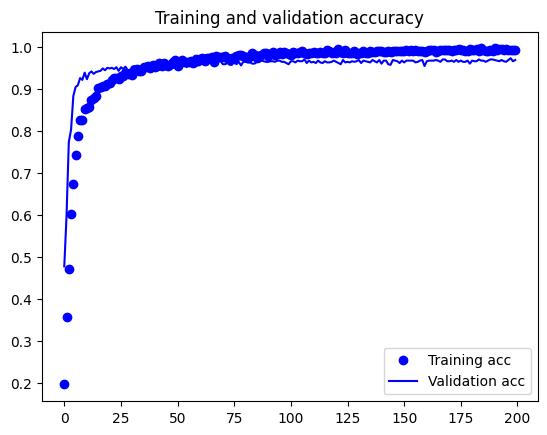

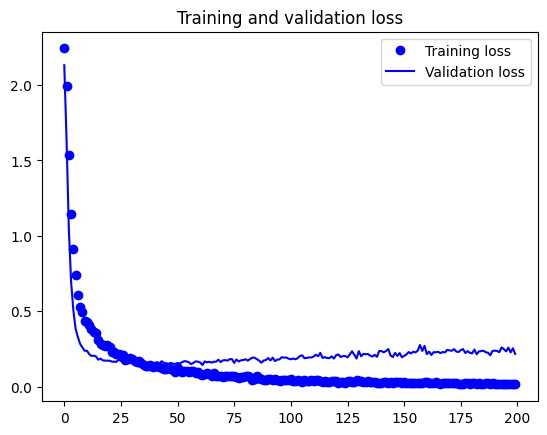

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [21]:
model.evaluate(X_test_28, y_test)

13/13 [==============================] - 1s 17ms/step - loss: 2.2985 - accuracy: 0.1875


[2.2985174655914307, 0.1875]

Can you feed data with different dimention (such as 32x32)?

In [22]:
model.evaluate(X_test_32, y_test)

13/13 [==============================] - 1s 19ms/step - loss: 2.2978 - accuracy: 0.1700


[2.297828435897827, 0.17000000178813934]

No! you cannot! It raises "Matrix size-incompatible" Error,
because we have used FC layers with **Flatten**

## solution?!

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 1, 1, 64)          0

In [24]:
# 5. Define model architecture
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(32, 32, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 1024)             

In [25]:
# 5. Define model architecture
model3 = Sequential()
model3.add(layers.Conv2D(32, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(64, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(64, (3, 3), activation='relu'))
model3.add(layers.GlobalAveragePooling2D()) # the solution
model3.add(layers.Dense(64, activation='relu'))
model3.add(Dropout(0.5))
model3.add(layers.Dense(10, activation='softmax'))



In [31]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 global_average_pooling2d (  (None, 64)               

In [32]:
# 6. Compile model
model3.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


# 7. Fit model on training data
history = model3.fit(X_train_28, y_train,
          epochs=80, batch_size=256, validation_split=0.2)


Epoch 1/80
11/11 [==============================] - 3s 73ms/step - loss: 2.2743 - accuracy: 0.1775 - val_loss: 2.2023 - val_accuracy: 0.3714
Epoch 2/80
11/11 [==============================] - 0s 9ms/step - loss: 2.1096 - accuracy: 0.3071 - val_loss: 1.8672 - val_accuracy: 0.5057
Epoch 3/80
11/11 [==============================] - 0s 10ms/step - loss: 1.7369 - accuracy: 0.4118 - val_loss: 1.2922 - val_accuracy: 0.6886
Epoch 4/80
11/11 [==============================] - 0s 11ms/step - loss: 1.3418 - accuracy: 0.5321 - val_loss: 0.9037 - val_accuracy: 0.7900
Epoch 5/80
11/11 [==============================] - 0s 11ms/step - loss: 1.0766 - accuracy: 0.6086 - val_loss: 0.6984 - val_accuracy: 0.8100
Epoch 6/80
11/11 [==============================] - 0s 11ms/step - loss: 0.8795 - accuracy: 0.6761 - val_loss: 0.5775 - val_accuracy: 0.8043
Epoch 7/80
11/11 [==============================] - 0s 10ms/step - loss: 0.7434 - accuracy: 0.7339 - val_loss: 0.4699 - val_accuracy: 0.8543
Epoch 8/80
11/

## lets evaluate it with 28x28

In [33]:
model3.evaluate(X_test_28, y_test)

13/13 [==============================] - 0s 3ms/step - loss: 0.0429 - accuracy: 0.9875


[0.04291549697518349, 0.987500011920929]

## Now try it with different size!!!!

In [ ]:
model.evaluate(X_test_32, y_test)